In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = 10,6

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the cleaned data
data1 = pd.read_csv('../Principal_Commodity_Wise_Export/2014-2015.csv')
data2 = pd.read_csv('../Principal_Commodity_Wise_Export/2015-2016.csv')
data3 = pd.read_csv('../Principal_Commodity_Wise_Export/2016-2017.csv')
data4 = pd.read_csv('../Principal_Commodity_Wise_Export/2017-2018.csv')

<h3> Now, we will perform descriptive statistical analysis to gather interesting and useful information :  </h3> <br>
 - Commodity wise average, median, std, min, max of revenue generated for each year <br>
 - Commodity wise average, median, std, min, max quantity sold for each year <br>
 - Commodity wise total revenue generated for each year <br>
 - Commodity wise total quantity sold for each year <br> <br>
 - Country wise average, median, std, min, max of revenue generated for each year <br>
 - Country wise total revenue generated for each year

<h5> Year 2014-2015 </h5>

In [3]:
# Commodity wise information of revenue generated (Sorted by mean revenue in descending order)
revenue1 = data1[['COMMODITY', 'UNIT_CODE', 'VALUES (US$ million)']].groupby(
    by = 'COMMODITY').describe()[['VALUES (US$ million)']].sort_values(
    by = ('VALUES (US$ million)', 'mean'), ascending = False).head(10)

In [4]:
revenue1

VALUES (US$ million)                           \
                                              count        mean          std   
COMMODITY                                                                      
GOLD                                            6.0  474.191662  1146.247431   
PETROLEUM PRODUCTS                            160.0  354.963437   979.927941   
PEARL, PRECS, SEMIPRECS STONES                118.0  209.820243  1102.513205   
GOLD AND OTH PRECS METL JWLERY                137.0   96.659907   621.576990   
SHIP, BOAT AND FLOATING STRUCT                 69.0   76.353057   234.107692   
BUFFALO MEAT                                   65.0   73.556587   277.977377   
AIRCRAFT, SPACECRAFT AND PARTS                 90.0   68.427870   229.956945   
DRUG FORMULATIONS, BIOLOGICALS                205.0   54.711529   267.275963   
IRON ORE                                       10.0   51.526995    77.985864   
IRON AND STEEL                                180.0   48.246694   114.336410   

                                                                          \
                                     min       25%        50%        75%   
COMMODITY                                                                  
GOLD                            0.001676  0.072575   0.453770  22.962450   
PETROLEUM PRODUCTS              0.000089  0.090623   0.993297  47.616681   
PEARL, PRECS, SEMIPRECS STONES  0.000025  0.009279   0.128563   4.240774   
GOLD AND OTH PRECS METL JWLERY  0.000185  0.011074   0.090677   3.781801   
SHIP, BOAT AND FLOATING STRUCT  0.000267  0.012866   0.142340  10.532227   
BUFFALO MEAT                    0.000162  0.855201   5.499425  27.368425   
AIRCRAFT, SPACECRAFT AND PARTS  0.000032  0.054809   1.088334  11.274097   
DRUG FORMULATIONS, BIOLOGICALS  0.000034  1.363517  11.341290  37.099527   
IRON ORE                        0.000766  0.126825   3.109246  70.591807   
IRON AND STEEL                  0.000120  0.798442   5.677614  32.505239   

                                             
                                        max  
COMMODITY                                    
GOLD                            2813.829901  
PETROLEUM PRODUCTS              6215.192075  
PEARL, PRECS, SEMIPRECS STONES  9439.054018  
GOLD AND OTH PRECS METL JWLERY  6491.043202  
SHIP, BOAT AND FLOATING STRUCT  1139.404697  
BUFFALO MEAT                    2152.861013  
AIRCRAFT, SPACECRAFT AND PARTS  1745.174591  
DRUG FORMULATIONS, BIOLOGICALS  3731.861006  
IRON ORE                         196.807808  
IRON AND STEEL                   700.270326

In [5]:
# Commodity wise total revenue generated
revenue_total1 = data1[['COMMODITY', 'UNIT_CODE', 'VALUES (US$ million)']].groupby(
    by = 'COMMODITY').sum()[['VALUES (US$ million)']].sort_values(
    by = 'VALUES (US$ million)', ascending = False).head(10)

In [6]:
revenue_total1

,VALUES (US$ million)
COMMODITY,
PETROLEUM PRODUCTS,56794.149959
"PEARL, PRECS, SEMIPRECS STONES",24758.788719
GOLD AND OTH PRECS METL JWLERY,13242.407314
"DRUG FORMULATIONS, BIOLOGICALS",11215.863487
RMG COTTON INCL ACCESSORIES,9282.828618
IRON AND STEEL,8684.404942
PRODUCTS OF IRON AND STEEL,7562.810880
MOTOR VEHICLE/CARS,6684.048142
"AIRCRAFT, SPACECRAFT AND PARTS",6158.508268


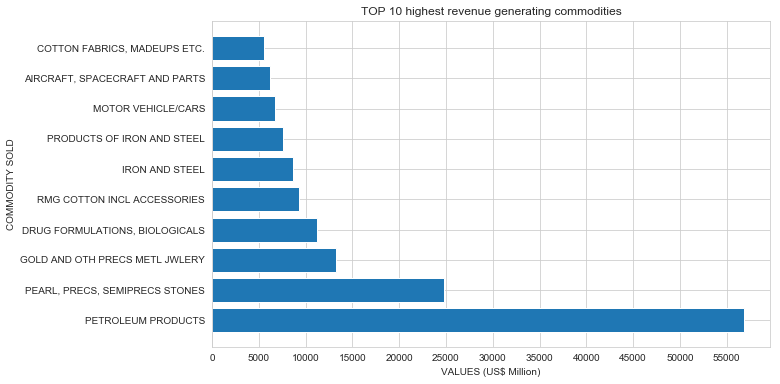

In [89]:
plt.barh(revenue_total1.index, revenue_total1['VALUES (US$ million)'])
plt.xticks(np.arange(0, 60000, step = 5000))
plt.xlabel('VALUES (US$ Million)') 
plt.ylabel('COMMODITY SOLD')
plt.title('TOP 10 highest revenue generating commodities')
plt.show()

In [21]:
# Commodity wise information of Quantity sold 
quantity1 = data1[['COMMODITY', 'UNIT_CODE', 'QTY', 'VALUES (US$ million)']].groupby(
    by = ['COMMODITY', 'UNIT_CODE']).describe()[['QTY']].sort_values(
    by = ('QTY', 'mean'), ascending = False)

quantity1.reset_index(inplace = True)

In [24]:
# Checking top 10 quantities by mean which are having TON as unit
quantity1[quantity1['UNIT_CODE'] == 'TON'].sort_values(by = ('QTY', 'mean'), ascending = False).head(10)

COMMODITY UNIT_CODE    QTY                 \
                                              count           mean   
1                         IRON ORE       TON   10.0  729810.700000   
3               PETROLEUM PRODUCTS       TON  160.0  456919.362500   
6   GRANIT, NATRL STONE AND PRODCT       TON  183.0   75160.372503   
7                   IRON AND STEEL       TON  180.0   61938.272222   
8         RICE(OTHER THAN BASMOTI)       TON  144.0   57654.229167   
9    CMNT, CLINKR AND ASBSTOS CMNT       TON  115.0   56483.008696   
10                           WHEAT       TON   59.0   49560.220339   
11              PROCESSED MINERALS       TON  139.0   47259.535871   
12                       OIL MEALS       TON   90.0   43384.322222   
13    COAL,COKE AND BRIQUITTES ETC       TON   32.0   41969.031250   

                                                                         
             std     min       25%        50%          75%          max  
1   1.380463e+06  15.000  1025.000  38750.000  529614.2500  4287520.000  
3   1.270488e+06   0.000    67.500    782.500   51299.2500  8012428.000  
6   4.335653e+05   0.001    71.003    911.986    8876.4680  4267870.088  
7   1.567093e+05   0.000   731.500   5540.000   39450.0000   970640.000  
8   1.624462e+05   0.000   291.250   3031.000   28084.0000  1268343.000  
9   3.081541e+05   0.000    23.000    121.000    1580.0000  2670232.000  
10  1.607046e+05   0.000    10.000    250.000   23892.5000  1123305.000  
11  1.510711e+05   0.004   176.830   1140.000   16246.8035  1244826.567  
12  1.306077e+05   0.000    43.750    778.000    9827.2500   962762.000  
13  1.338691e+05   0.000    44.500    142.000    1240.5000   544690.000

In [25]:
# Checking top 10 quantities by mean which are having SQM as unit
quantity1[quantity1['UNIT_CODE'] == 'SQM'].sort_values(by = ('QTY', 'mean'), ascending = False).head(10)

COMMODITY UNIT_CODE    QTY                               \
                                           count           mean           std   
2   CARPET(EXCL. SILK) HANDMADE       SQM  159.0  499149.396226  3.233999e+06   
5           FLOOR CVRNG OF JUTE       SQM   87.0   89749.977011  5.435859e+05   
73                  SILK CARPET       SQM   48.0     457.979167  1.096893e+03   

                                                
    min     25%     50%        75%         max  
2   1.0  1044.0  9674.0  103202.00  39985004.0  
5   0.0   300.0  2250.0   18654.50   5054106.0  
73  2.0    11.5    59.0     193.25      6403.0

In [26]:
# Checking top 10 quantities by mean which are having LTR(Litre) as unit
quantity1[quantity1['UNIT_CODE'] == 'LTR'].sort_values(by = ('QTY', 'mean'), ascending = False).head(10)

COMMODITY UNIT_CODE    QTY                                   \
                                  count          mean           std  min   
0  ALCOHOLIC BEVERAGES       LTR  111.0  2.432407e+06  6.085268e+06  2.0   

                                             
       25%       50%        75%         max  
0  12695.0  193749.0  2252652.0  40138899.0

In [27]:
# Checking top 10 quantities by mean which are having NOS(Numbers) as unit
quantity1[quantity1['UNIT_CODE'] == 'NOS'].sort_values(by = ('QTY', 'mean'), ascending = False).head(10)

COMMODITY UNIT_CODE    QTY                                \
                                      count           mean            std   
4     AUTO TYRES AND TUBES       NOS  164.0  187265.908537  394993.644802   
19  TWO AND THREE WHEELERS       NOS  138.0   18798.949275   63241.809805   
30      MOTOR VEHICLE/CARS       NOS  165.0    6729.751515   19023.402571   

                                                 
    min      25%      50%        75%        max  
4   2.0  5536.25  35157.5  149503.25  2346737.0  
19  1.0    59.75    652.5    4715.00   464896.0  
30  1.0    58.00    366.0    3701.00   125004.0

From above tables showing top Quantities sold, we can see that mostly weighted commodities having unit Ton(Tonnes) were sold. 

In [28]:
# Commodity wise total quatities sold
quantity_total1 = data1[['COMMODITY', 'UNIT_CODE', 'QTY', 'VALUES (US$ million)']].groupby(
    by = ['COMMODITY', 'UNIT_CODE']).sum()[['QTY']]

quantity_total1.reset_index(inplace = True)

In [35]:
# Checking top 10 quantities by total which are having TON as unit
ton1 = quantity_total1[quantity_total1['UNIT_CODE'] == 'TON'].sort_values(by = 'QTY', ascending = False).head(10)
ton1

,COMMODITY,UNIT_CODE,QTY
68,PETROLEUM PRODUCTS,TON,7.310710e+07
35,"GRANIT, NATRL STONE AND PRODCT",TON,1.375435e+07
41,IRON AND STEEL,TON,1.114889e+07
80,RICE(OTHER THAN BASMOTI),TON,8.302209e+06
42,IRON ORE,TON,7.298107e+06
74,PROCESSED MINERALS,TON,6.569075e+06
13,"CMNT, CLINKR AND ASBSTOS CMNT",TON,6.495546e+06
58,OIL MEALS,TON,3.904589e+06
79,RICE -BASMOTI,TON,3.698927e+06
62,OTHER CRUDE MINERALS,TON,3.532838e+06


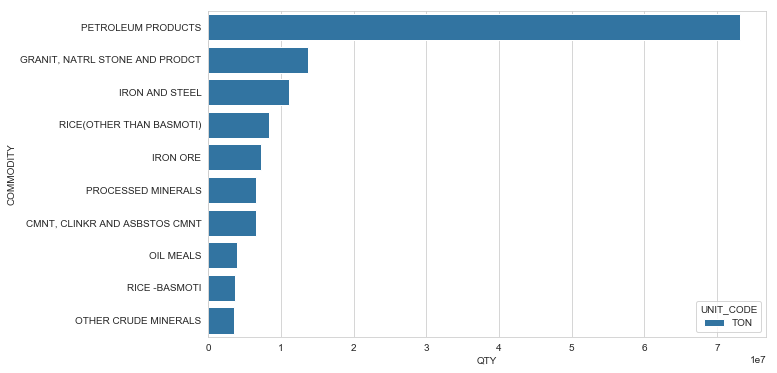

In [109]:
sns.barplot(x = 'QTY', y = 'COMMODITY', hue = 'UNIT_CODE', data = ton1, orient = 'h')

In [36]:
# Checking top 10 quantities by total which are having SQM as unit
sqm1 = quantity_total1[quantity_total1['UNIT_CODE'] == 'SQM'].sort_values(by = 'QTY', ascending = False).head(10)
sqm1

,COMMODITY,UNIT_CODE,QTY
8,CARPET(EXCL. SILK) HANDMADE,SQM,79364754.0
29,FLOOR CVRNG OF JUTE,SQM,7808248.0
85,SILK CARPET,SQM,21983.0


In [37]:
# Checking top 10 quantities by total which are having LTR(Litre) as unit
ltr1 = quantity_total1[quantity_total1['UNIT_CODE'] == 'LTR'].sort_values(by = 'QTY', ascending = False).head(10)
ltr1

,COMMODITY,UNIT_CODE,QTY
1,ALCOHOLIC BEVERAGES,LTR,269997231.0


In [38]:
# Checking top 10 quantities by total which are having NOS(Numbers) as unit
nos1 = quantity_total1[quantity_total1['UNIT_CODE'] == 'NOS'].sort_values(by = 'QTY', ascending = False).head(10)
nos1

,COMMODITY,UNIT_CODE,QTY
4,AUTO TYRES AND TUBES,NOS,30711609.0
95,TWO AND THREE WHEELERS,NOS,2594255.0
53,MOTOR VEHICLE/CARS,NOS,1110409.0


- We can conclude that PETROLEUM PRODUCTS are highest revenue generator and also they were sold in maximum quantity. <br>
- ALCOHOLIC BEVERAGES were also sold in huge quantity but they are not among the top 10 revenue generators. <br>
- CARPET was also sold in large quantity but again not among top 10 revenue generators. <br>
- We must try to increase the quantity for the products, which are top 10 revenue generators. Currently only PETROLEUM PRODUCTS are on top both in Quantity Sold and Revenue segement.

In [110]:
# Country wise information of revenue generated (Sorted by mean revenue in descending order)
revenue1 = data1[['COUNTRY', 'UNIT_CODE', 'VALUES (US$ million)']].groupby(
    by = 'COUNTRY').describe()[['VALUES (US$ million)']].sort_values(
    by = ('VALUES (US$ million)', 'mean'), ascending = False).head(10)

In [111]:
revenue1

VALUES (US$ million)                                    \
                             count        mean         std       min   
COUNTRY                                                                
U S A                        160.0  265.401383  736.437632  0.000332   
U ARAB EMTS                  160.0  206.425519  775.540042  0.002170   
HONG KONG                    149.0   91.274354  804.005140  0.000754   
CHINA P RP                   150.0   79.723421  237.982772  0.001887   
SAUDI ARAB                   155.0   72.016452  457.898832  0.000629   
SINGAPORE                    152.0   64.536364  438.052723  0.000064   
U K                          157.0   59.580945  126.300583  0.000263   
GERMANY                      157.0   48.024165   91.086745  0.000004   
BRAZIL                       136.0   43.851644  272.712840  0.000758   
SRI LANKA DSR                153.0   43.815165  172.748923  0.001768   

                                                             
                    25%        50%         75%          max  
COUNTRY                                                      
U S A          7.280089  43.820106  181.194562  6534.683317  
U ARAB EMTS    4.977980  29.650848   97.444977  6491.043202  
HONG KONG      0.164191   1.501443    6.855239  9439.054018  
CHINA P RP     1.270586   9.480013   56.715945  1891.121541  
SAUDI ARAB     1.575271   7.783011   29.381786  5559.181554  
SINGAPORE      1.073854   4.809728   22.595099  5322.211313  
U K            2.174682  12.504897   51.524257  1127.803131  
GERMANY        1.134831  10.761943   55.308877   790.669225  
BRAZIL         0.404843   2.771251   18.641263  3155.069503  
SRI LANKA DSR  0.545317   4.163711   18.465323  1745.174591

In [112]:
# Country wise total revenue generated
revenue_total1 = data1[['COUNTRY', 'UNIT_CODE', 'VALUES (US$ million)']].groupby(
    by = 'COUNTRY').sum()[['VALUES (US$ million)']].sort_values(
    by = 'VALUES (US$ million)', ascending = False).head(10)

In [113]:
revenue_total1

,VALUES (US$ million)
COUNTRY,
U S A,42464.221324
U ARAB EMTS,33028.083115
HONG KONG,13599.878780
CHINA P RP,11958.513105
SAUDI ARAB,11162.550010
SINGAPORE,9809.527277
U K,9354.208308
GERMANY,7539.793842
SRI LANKA DSR,6703.720268


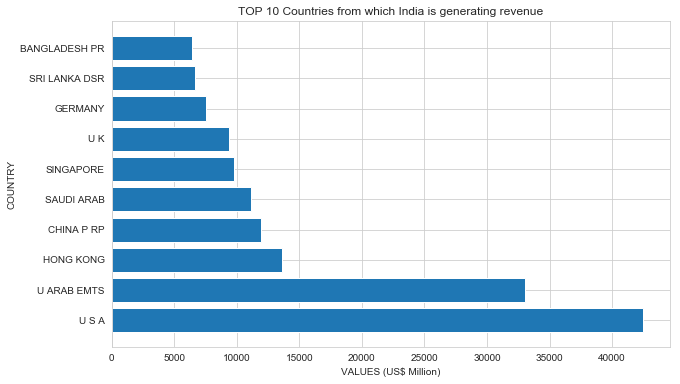

In [114]:
plt.barh(revenue_total1.index, revenue_total1['VALUES (US$ million)'])
plt.xticks(np.arange(0, 45000, step = 5000))
plt.xlabel('VALUES (US$ Million)') 
plt.ylabel('COUNTRY')
plt.title('TOP 10 Countries from which India is getting highest revenue')
plt.show()